In [1]:
from typing import Literal
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.graph import END, StateGraph, MessagesState



# Initialize the OpenAI model
model = ChatOpenAI(model="gpt-4o-mini", temperature=0)

In [10]:
# source: https://langchain-ai.github.io/langgraph/#step-by-step-breakdown
# Function to call the model
from langchain_core.pydantic_v1 import BaseModel
from typing import List

class ExampleState(BaseModel):
    messages: List[str]


def call_model(state: ExampleState) -> str:
    response = model.invoke(state.messages)
    return {"messages": [response]}

In [11]:
# Define the workflow
# we initialize graph (StateGraph) by passing state schema (in our case MessagesState)
# MessagesState is a prebuilt state schema that has one attribute -- 
# a list of LangChain Message objects, as well as logic for merging the updates from each node into the state
workflow = StateGraph(ExampleState)

In [12]:
workflow.add_node("node 1", call_model)

In [18]:
def filter_node(state: ExampleState) -> str:
    model.invoke(["Filter the 3 best suggestions from here: " + state.messages[0]])

workflow.add_node("node 2", filter_node)

Adding a node to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [19]:
workflow.set_entry_point("node 1")

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


ValueError: Already found path for node '__start__'.
For multiple edges, use StateGraph with an annotated state key.

In [14]:
app = workflow.compile()

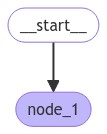

In [15]:
from IPython.display import Image
Image(app.get_graph().draw_mermaid_png())

In [16]:
response = app.invoke({"messages": ["Tell me 10 examples of things to do when I am bored."]})

In [17]:
response['messages'][-1].content

"Sure! Here are 10 activities you can try when you're feeling bored:\n\n1. **Read a Book**: Dive into a novel, non-fiction, or even a graphic novel. Reading can transport you to different worlds or teach you something new.\n\n2. **Start a DIY Project**: Get creative with some do-it-yourself crafts or home improvement projects. You could make decorations, upcycle old items, or try your hand at painting.\n\n3. **Learn a New Skill**: Use online platforms to learn something new, like a language, cooking, coding, or playing a musical instrument.\n\n4. **Go for a Walk or Hike**: Spend some time outdoors. A walk in nature can be refreshing and help clear your mind.\n\n5. **Watch a Documentary or Movie**: Explore a new genre or topic by watching a documentary or a film you’ve been meaning to see.\n\n6. **Try a New Recipe**: Experiment in the kitchen by trying out a new recipe or creating your own dish with whatever ingredients you have on hand.\n\n7. **Practice Mindfulness or Meditation**: Tak